In [9]:
import numpy as np
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import pandas as pd
import matplotlib.pyplot as plt
import pursuitnet as pn
import pursuitnet.nn as nn
import pursuitnet.optim as optim

In [10]:
# Set random seeds for reproducibility
# seed = 42
# np.random.seed(seed)
# torch.manual_seed(seed)
# if torch.cuda.is_available():
#     torch.cuda.manual_seed(seed)
#     torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

In [18]:
import pursuitnet as pn
import time

print("\nTesting all modules:")
pn.random.seed(int(time.time()))
pn.random.print_random_number()
pn.nn.print_random_number()
pn.optim.print_random_number()

print("\nTesting seeding:")
pn.random.seed(42)
pn.random.print_random_number()
pn.nn.print_random_number()
pn.optim.print_random_number()

print("\nTesting seeding again:")
pn.random.seed(42)
pn.random.print_random_number()
pn.nn.print_random_number()
pn.optim.print_random_number()

print("\nTesting without seeding:")
pn.random.print_random_number()
pn.nn.print_random_number()
pn.optim.print_random_number()


Testing all modules:
Random number from pursuitnet.random: 0.6234246779228859
Random number from pursuitnet.nn: 0.4432449458338923
Random number from pursuitnet.optim: 0.879834349637756

Testing seeding:
Random number from pursuitnet.random: 0.3745401188473625
Random number from pursuitnet.nn: 0.9507143064099162
Random number from pursuitnet.optim: 0.7319939418114051

Testing seeding again:
Random number from pursuitnet.random: 0.3745401188473625
Random number from pursuitnet.nn: 0.9507143064099162
Random number from pursuitnet.optim: 0.7319939418114051

Testing without seeding:
Random number from pursuitnet.random: 0.5986584841970366
Random number from pursuitnet.nn: 0.15601864044243652
Random number from pursuitnet.optim: 0.15599452033620265


0.15599452033620265

Load Data

In [12]:
# load the dataset, split into input (X) and output (y) variables
dataset = np.loadtxt('data/train.csv', delimiter=',', skiprows=1)
X = dataset[:,1:]
print(X)
y = dataset[:, 0]
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1. 0. 1. ... 7. 6. 9.]


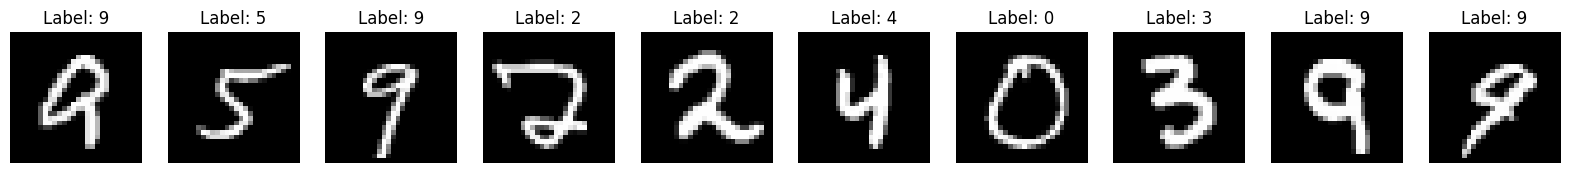

In [13]:
num_samples = 10
sample_indices = np.random.choice(len(X), num_samples, replace=False)
sample_images = X[sample_indices]
sample_labels = y[sample_indices]

# Visualize the samples along with their labels
fig, axes = plt.subplots(1, num_samples, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {int(sample_labels[i])}')
    ax.axis('off')
plt.show()

In [14]:
# Normalize the training data
X = X / 255.0  # Normalize pixel values to [0, 1]

In [15]:
# X = torch.tensor(X, dtype=torch.float32)
# y = torch.tensor(y, dtype=torch.int64)  # Class indices should be int64

Define PyTorch Model

In [16]:
model = nn.Sequential(
    nn.Linear(784, 300),
    nn.ReLU(),
    nn.Linear(300, 300),
    nn.ReLU(),
    nn.Linear(300, 10)
)

print(model)

AttributeError: 'NN' object has no attribute 'Sequential'

Define Loss Function and Optimizers

In [ ]:
loss_fn = nn.CrossEntropyLoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

Run a Training Loop

In [ ]:
# Run the training loop
n_epochs = 10
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i + batch_size]
        ybatch = y[i:i + batch_size]

        # Forward pass
        y_pred = model(Xbatch)

        # Compute loss
        loss = loss_fn(y_pred, ybatch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Finished epoch {epoch}, latest loss {loss.item()}')

Finished epoch 0, latest loss 0.008663278073072433
Finished epoch 1, latest loss 0.008068123832345009
Finished epoch 2, latest loss 0.0012432618532329798
Finished epoch 3, latest loss 0.0017320275073871017
Finished epoch 4, latest loss 0.001318757189437747
Finished epoch 5, latest loss 0.025599677115678787
Finished epoch 6, latest loss 0.0009961486794054508
Finished epoch 7, latest loss 8.535201232007239e-06
Finished epoch 8, latest loss 2.406681960565038e-05
Finished epoch 9, latest loss 4.468161205295473e-05


Evaluate the Model

In [ ]:
# Evaluate the model
with torch.no_grad():
    y_pred = model(X)
    predictions = torch.argmax(y_pred, dim=1)
    accuracy = (predictions == y).float().mean()
    print(f"Accuracy: {accuracy.item()}")

Accuracy: 0.9929285645484924


Make Predictions

In [ ]:
# Load the test dataset
test_data_path = 'data/test.csv'
test_df = pd.read_csv(test_data_path)

# Prepare the test data
test_X = test_df.values
test_X = test_X / 255.0  # Normalize pixel values to [0, 1]
test_X = torch.tensor(test_X, dtype=torch.float32)

model.eval()

# Make predictions
with torch.no_grad():
    outputs = model(test_X)
    test_predictions = torch.argmax(outputs, dim=1).numpy()

# Create a DataFrame with ImageId and Label
image_ids = np.arange(1, len(test_predictions) + 1)  # Assuming ImageId starts from 1
submission_df = pd.DataFrame({
    'ImageId': image_ids,
    'Label': test_predictions
})

# Save to CSV file
submission_df.to_csv('submission.csv', index=False)

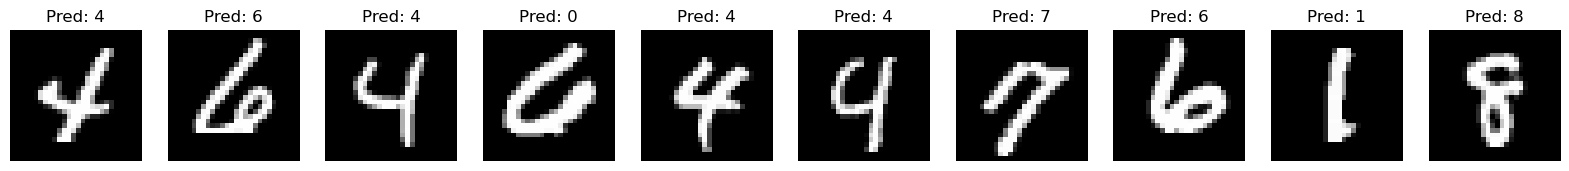

In [ ]:
# Select a few samples to visualize
num_samples = 10
sample_indices = np.random.choice(len(test_X), num_samples, replace=False)
sample_images = test_X[sample_indices].numpy()
sample_predictions = test_predictions[sample_indices]

# Visualize the samples along with their predicted labels
fig, axes = plt.subplots(1, num_samples, figsize=(20, 2))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Pred: {sample_predictions[i]}')
    ax.axis('off')
plt.show()